# Project: SVM

Team members:
- Anish Ghimire (**101143773**)
- Prajwol Tiwari (**101144638**)
- Pramesh Baral (**101139536**)
- Pradip Ganesh (**101125775**)
- Shashwat Shrestha (**101130302**)
- Raman Regmi (**101131084**)

**Overview**

The project demonstrates the application of Support Vector Machines (SVM) to classify the species of iris flowers based on the popular Iris dataset. This dataset includes data on the sepal and petal measurements of 150 iris flowers from three different species: Setosa, Versicolor, and Virginica.


## Data Exploration and Preparation

Importing required python libraries

In [1]:
from sklearn import svm
from sklearn import datasets

In [2]:
import pandas as pd
import numpy as np

In [3]:
iris = datasets.load_iris()

Loading the Iris dataset from scikit-learn and creating a DataFrame for ease of use.

In [4]:
iris_df = pd.DataFrame(data=np.c_[iris['data'], iris['target']], columns=iris['feature_names'] + ['target'])

In [5]:
iris_df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0.0
1,4.9,3.0,1.4,0.2,0.0
2,4.7,3.2,1.3,0.2,0.0
3,4.6,3.1,1.5,0.2,0.0
4,5.0,3.6,1.4,0.2,0.0


Statistical summary of the dataset to understand the dimensions and distribution of the Iris flowers across different measurement classes.



In [6]:
iris_df.describe().T

,count,mean,std,min,25%,50%,75%,max
sepal length (cm),150.0,5.843333,0.828066,4.3,5.1,5.80,6.4,7.9
sepal width (cm),150.0,3.057333,0.435866,2.0,2.8,3.00,3.3,4.4
petal length (cm),150.0,3.758000,1.765298,1.0,1.6,4.35,5.1,6.9
petal width (cm),150.0,1.199333,0.762238,0.1,0.3,1.30,1.8,2.5
target,150.0,1.000000,0.819232,0.0,0.0,1.00,2.0,2.0


No empty or Null data found

In [7]:
iris_df.isnull().sum()

sepal length (cm)    0
sepal width (cm)     0
petal length (cm)    0
petal width (cm)     0
target               0
dtype: int64

In [8]:
iris_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   sepal length (cm)  150 non-null    float64
 1   sepal width (cm)   150 non-null    float64
 2   petal length (cm)  150 non-null    float64
 3   petal width (cm)   150 non-null    float64
 4   target             150 non-null    float64
dtypes: float64(5)
memory usage: 6.0 KB


In [9]:
iris_df.shape

(150, 5)

Importing visualization libraries

In [10]:
import seaborn as sns
import matplotlib.pyplot as plt

Generating pair plot of the Iris dataset to get the comprehensive overview of the relationships within the data, guided by the categorization of species. It helps to spot patterns, outliers and insights into the suitability of features for classification task.

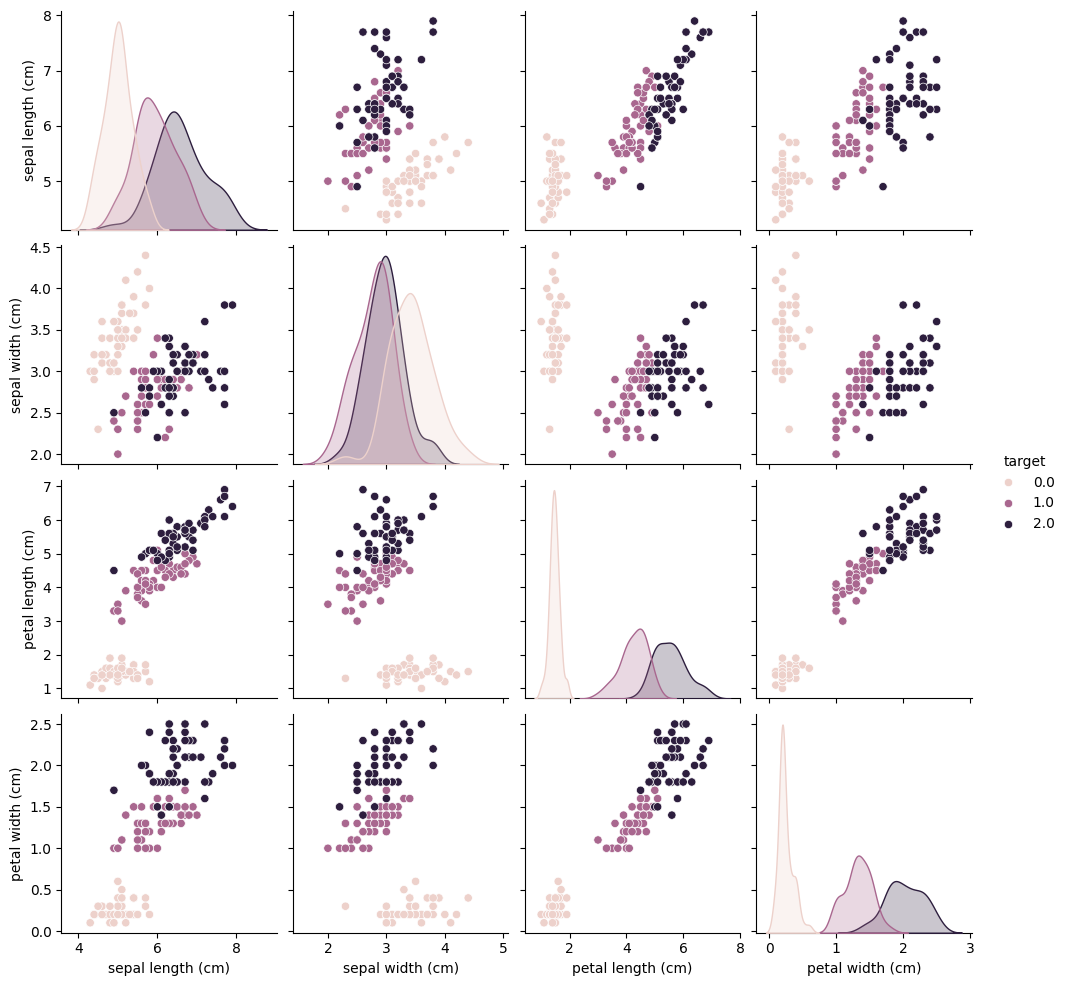

In [11]:
sns.pairplot(iris_df, hue='target')

Creating a heatmap of the correlation matrix of the Iris dataset.

<Axes: >

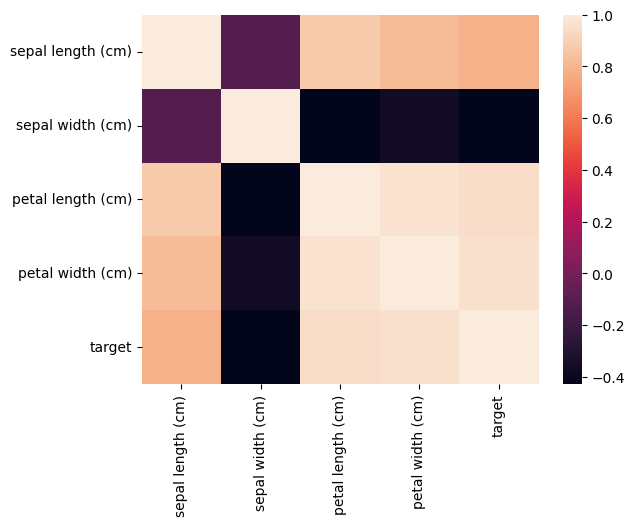

In [12]:
sns.heatmap(iris_df.corr())

Split the dataset into features and target for training and testing 60% of the data is used for training and 40% for testing, ensuring enough data for training while also maintaining a significant test set

In [13]:
from sklearn.model_selection import train_test_split

In [14]:
X_train, X_test, y_train, y_test = train_test_split(iris_df.iloc[:, :-1], iris_df['target'], test_size=0.4, random_state=24)

In [15]:
X_train

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
61,5.9,3.0,4.2,1.5
50,7.0,3.2,4.7,1.4
43,5.0,3.5,1.6,0.6
116,6.5,3.0,5.5,1.8
52,6.9,3.1,4.9,1.5
...,...,...,...,...
129,7.2,3.0,5.8,1.6
147,6.5,3.0,5.2,2.0
145,6.7,3.0,5.2,2.3
87,6.3,2.3,4.4,1.3


In [16]:
y_train

61     1.0
50     1.0
43     0.0
116    2.0
52     1.0
      ... 
129    2.0
147    2.0
145    2.0
87     1.0
131    2.0
Name: target, Length: 90, dtype: float64

## SVM Implementation

Importing the Support Vector Machine Classifier and `classification_report` to create model and evaluate the model

In [17]:
from sklearn.svm import SVC
from sklearn.metrics import classification_report

Finding the best parameters for a Support Vector Machine (SVM) classifier using `GridSearchCV` from scikit-learn.

Setting up a parameter grid for SVM tuning  
- C: Regularization parameter. The strength of the regularization is inversely proportional to C. Must be strictly positive.  
- gamma: Kernel coefficient for 'rbf', 'poly', and 'sigmoid'.  
- kernel: Specifies the kernel type to be used in the algorithm.  
  
  
Configuring GridSearchCV with the SVC classifier, the parameter grid, and settings for refitting and verbosity  
GridSearchCV performs exhaustive search over specified parameter values for an estimator, optimizing for best cross-validation score


In [18]:
from sklearn.model_selection import GridSearchCV


param_grid = {'C': [0.1, 1, 10, 100, 1000],
             'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
             'kernel': ['linear', 'poly', 'rbf', 'sigmoid']}

grid = GridSearchCV(SVC(), param_grid, refit = True, verbose = 3)

grid.fit(X_train, y_train)

Fitting 5 folds for each of 100 candidates, totalling 500 fits
[CV 1/5] END .....C=0.1, gamma=1, kernel=linear;, score=1.000 total time=   0.1s
[CV 2/5] END .....C=0.1, gamma=1, kernel=linear;, score=0.833 total time=   0.0s
[CV 3/5] END .....C=0.1, gamma=1, kernel=linear;, score=0.944 total time=   0.0s
[CV 4/5] END .....C=0.1, gamma=1, kernel=linear;, score=0.944 total time=   0.0s
[CV 5/5] END .....C=0.1, gamma=1, kernel=linear;, score=1.000 total time=   0.0s
[CV 1/5] END .......C=0.1, gamma=1, kernel=poly;, score=1.000 total time=   0.0s
[CV 2/5] END .......C=0.1, gamma=1, kernel=poly;, score=0.889 total time=   0.0s
[CV 3/5] END .......C=0.1, gamma=1, kernel=poly;, score=0.944 total time=   0.0s
[CV 4/5] END .......C=0.1, gamma=1, kernel=poly;, score=1.000 total time=   0.0s
[CV 5/5] END .......C=0.1, gamma=1, kernel=poly;, score=0.889 total time=   0.0s
[CV 1/5] END ........C=0.1, gamma=1, kernel=rbf;, score=1.000 total time=   0.0s
[CV 2/5] END ........C=0.1, gamma=1, kernel=rb

GridSearchCV(estimator=SVC(),
             param_grid={'C': [0.1, 1, 10, 100, 1000],
                         'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
                         'kernel': ['linear', 'poly', 'rbf', 'sigmoid']},
             verbose=3)

Extracting the best parameters and estimators for the SVM from the grid search

In [19]:
print(grid.best_params_)

{'C': 1, 'gamma': 1, 'kernel': 'linear'}


In [20]:
print(grid.best_estimator_)

SVC(C=1, gamma=1, kernel='linear')


Evaluating the best model's performance from the grid search using the test set

In [21]:
grid_predictions = grid.predict(X_test)

print(classification_report(y_test, grid_predictions))

              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00        21
         1.0       1.00      1.00      1.00        17
         2.0       1.00      1.00      1.00        22

    accuracy                           1.00        60
   macro avg       1.00      1.00      1.00        60
weighted avg       1.00      1.00      1.00        60



**Manual Comparision**  
  
The grid search gave the best parameters for our SVM usecase, and `linear` kernel yeilding the best result.  

Comparing Support Vector Machine Classifiers with different kernel configurations manually as well

SVM with linear kernel

In [22]:
svm_linear = SVC(kernel='linear')
svm_linear.fit(X_train, y_train)
y_pred = svm_linear.predict(X_test)
print('Results for SVM with linear kernel')
print(classification_report(y_test, y_pred))

Results for SVM with linear kernel
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00        21
         1.0       1.00      1.00      1.00        17
         2.0       1.00      1.00      1.00        22

    accuracy                           1.00        60
   macro avg       1.00      1.00      1.00        60
weighted avg       1.00      1.00      1.00        60



SVM with polynomial (degree 3) kernel

In [23]:
svm_poly = SVC(kernel='poly')
svm_poly.fit(X_train, y_train)
y_pred = svm_poly.predict(X_test)
print('Results for SVM with polynomial kernel')
print(classification_report(y_test, y_pred))

Results for SVM with polynomial kernel
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00        21
         1.0       1.00      0.88      0.94        17
         2.0       0.92      1.00      0.96        22

    accuracy                           0.97        60
   macro avg       0.97      0.96      0.96        60
weighted avg       0.97      0.97      0.97        60



SVM with RBF kernel

In [24]:
svm_rbf = SVC(kernel='rbf')
svm_rbf.fit(X_train, y_train)
y_pred = svm_rbf.predict(X_test)
print('Results for SVM with RBF kernel')
print(classification_report(y_test, y_pred))

Results for SVM with RBF kernel
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00        21
         1.0       1.00      0.94      0.97        17
         2.0       0.96      1.00      0.98        22

    accuracy                           0.98        60
   macro avg       0.99      0.98      0.98        60
weighted avg       0.98      0.98      0.98        60



SVM with sigmoid kernel

In [25]:
svm_sigmoid = SVC(kernel='sigmoid', gamma='auto')
svm_sigmoid.fit(X_train, y_train)
y_pred = svm_sigmoid.predict(X_test)
print('Results for SVM with sigmoid kernel')
print(classification_report(y_test, y_pred, zero_division=0))

Results for SVM with sigmoid kernel
              precision    recall  f1-score   support

         0.0       0.00      0.00      0.00        21
         1.0       0.28      1.00      0.44        17
         2.0       0.00      0.00      0.00        22

    accuracy                           0.28        60
   macro avg       0.09      0.33      0.15        60
weighted avg       0.08      0.28      0.13        60



The SVM with a linear kernel achieved perfect precision, recall, and f1-scores of 1.00 across all classes, leading to an overall accuracy of 100%.  
  
Both the polynomial and RBF kernels performed slightly worse, with the polynomial kernel having slightly lower precision and recall for class 1 and the RBF kernel showing a minor drop in precision for class 2, both resulting in slightly lower overall accuracies (97% and 98%, respectively).  
  
The SVM with a sigmoid kernel performed poorly, with very low precision and recall for classes 0 and 2, and an overall accuracy of only 28%.  
  
Thus, the linear kernel outperformed the others significantly, with the sigmoid kernel being the least effective for this dataset.

Further studying the inner-workings of the SVM classifiers with different kernels by visualizing the decision boundries created by them.  
  
A 2D projection of the Iris dataset features is used for ease of plotting scatter plots.
  
2*2 subplot depecting the decision boundary corresponding to the kernel types overlaying the scatter plot of the dataset's first two features (sepal length and sepal width) is generated.

In [26]:
from sklearn.inspection import DecisionBoundaryDisplay

In [27]:
svm_linear_2d = SVC(kernel='linear')
svm_linear_2d.fit(X_train.iloc[:, :2], y_train)

svm_poly_2d = SVC(kernel='poly')
svm_poly_2d.fit(X_train.iloc[:, :2], y_train)

svm_rbf_2d = SVC(kernel='rbf')
svm_rbf_2d.fit(X_train.iloc[:, :2], y_train)

svm_sigmoid_2d = SVC(kernel='sigmoid', gamma=2)
svm_sigmoid_2d.fit(X_train.iloc[:, :2], y_train)

print('SVMs with linear, polynomial, rbf and sigmoid kernels training completed...')

SVMs with linear, polynomial, rbf and sigmoid kernels training completed...


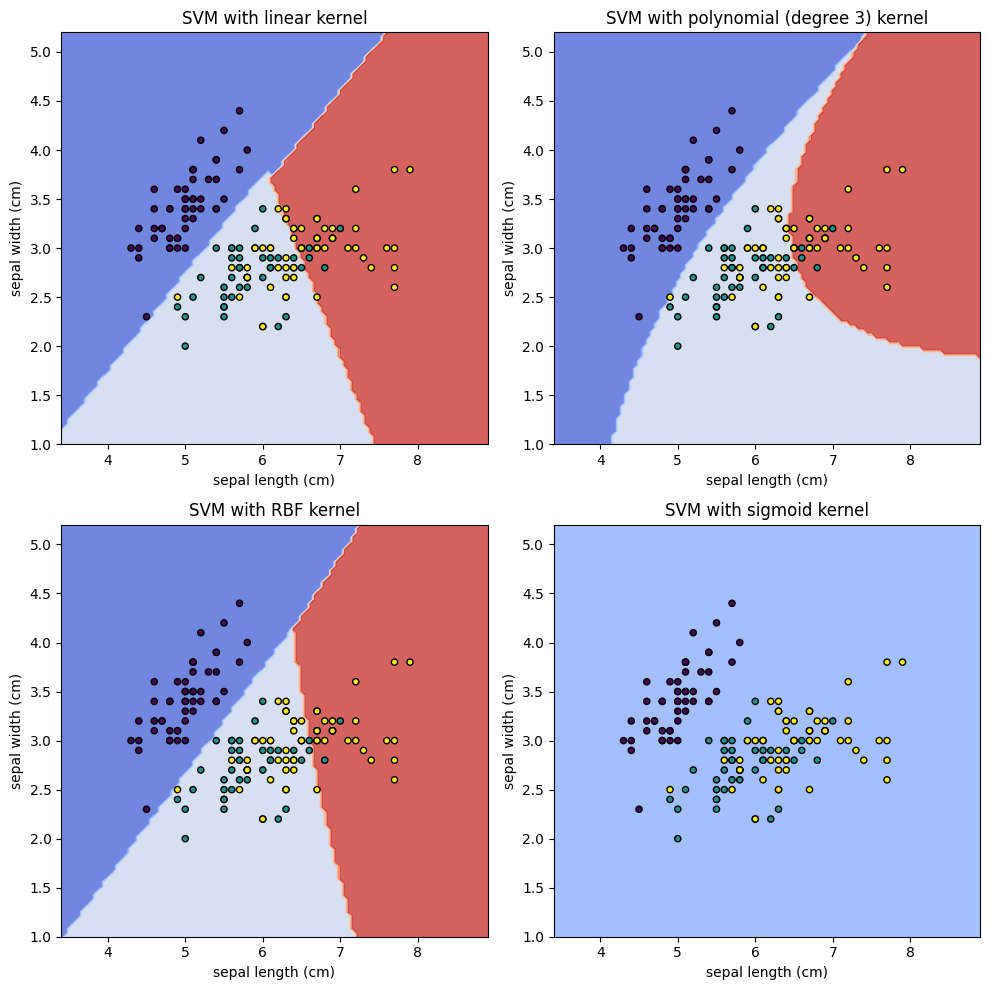

In [28]:
fig, axs = plt.subplots(2, 2, figsize=(10, 10))

axs[0,0].set_title('SVM with linear kernel')
disp = DecisionBoundaryDisplay.from_estimator(
    svm_linear_2d, X_train.iloc[:, :2], response_method="predict",
    cmap=plt.cm.coolwarm,
    alpha=0.8,
    ax=axs[0, 0]
)
axs[0,0].scatter(iris_df.iloc[:, 0], iris_df.iloc[:, 1], c=iris_df['target'], s=20, edgecolors='k')


axs[0,1].set_title('SVM with polynomial (degree 3) kernel')
disp = DecisionBoundaryDisplay.from_estimator(
    svm_poly_2d, X_train.iloc[:, :2], response_method="predict",
    cmap=plt.cm.coolwarm,
    alpha=0.8,
    ax=axs[0, 1]
)
axs[0,1].scatter(iris_df.iloc[:, 0], iris_df.iloc[:, 1], c=iris_df['target'], s=20, edgecolors='k')


axs[1,0].set_title('SVM with RBF kernel')
disp = DecisionBoundaryDisplay.from_estimator(
    svm_rbf_2d, X_train.iloc[:, :2], response_method="predict",
    cmap=plt.cm.coolwarm,
    alpha=0.8,
    ax=axs[1, 0]
)
axs[1,0].scatter(iris_df.iloc[:, 0], iris_df.iloc[:, 1], c=iris_df['target'], s=20, edgecolors='k')


axs[1,1].set_title('SVM with sigmoid kernel')
disp = DecisionBoundaryDisplay.from_estimator(
    svm_sigmoid_2d, X_train.iloc[:, :2], response_method="predict",
    cmap=plt.cm.coolwarm,
    alpha=0.8,
    ax=axs[1, 1]
)
axs[1,1].scatter(iris_df.iloc[:, 0], iris_df.iloc[:, 1], c=iris_df['target'], s=20, edgecolors='k')

plt.tight_layout()
plt.show()

The decision boundaries generated helps clear the idea about how the SVM with different kernels are working.  
  
The previously generated results align with this visualization. For e.g, the SVM with sigmoid kernel failed to learn the dataset and gave very poor result. We can see in the figure above that the SVM with sigmoid kernel failed to generate a proper decision boundary.

**Final SVM Classifier (the best model)**
  
Creating and traininig the final SVM Classifier using the best parameters yeilded by the grid search.

In [29]:
svm_final = SVC(C=1, gamma=1, kernel='linear')
svm_final.fit(X_train, y_train)
y_pred = svm_final.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00        21
         1.0       1.00      1.00      1.00        17
         2.0       1.00      1.00      1.00        22

    accuracy                           1.00        60
   macro avg       1.00      1.00      1.00        60
weighted avg       1.00      1.00      1.00        60



## K-fold Cross-Validation

Permorming 10-fold cross-validation to evaluate the performance of the final SVM with the best parameters on the Iris Dataset.  

 Cross-validation is a statistical method used to estimate the skill of machine learning models. It is more stable and thorough than using the simple split approach.

In [30]:
from sklearn.model_selection import KFold, cross_val_score

kfold = KFold(n_splits=10, random_state=42, shuffle=True)

cv_scores = cross_val_score(svm_final, iris_df.iloc[:, :-1], iris_df['target'], cv=kfold, scoring='accuracy')

print("Accuracy scores for each fold:")
print(cv_scores)

print(f"\nMean cross-validation score: {np.mean(cv_scores):.2f}")
print(f"Standard deviation of cross-validation scores: {np.std(cv_scores):.2f}")

Accuracy scores for each fold:
[1.         1.         1.         1.         1.         0.93333333
 0.86666667 1.         1.         0.93333333]

Mean cross-validation score: 0.97
Standard deviation of cross-validation scores: 0.04


The K-fold Cross-validation results indicate a robost and reliable SVM model for the Iris dataset  
- Achieved perfect accuracy (1.00) in 7 out of 10 folds.
- Showed slight variability with accuracies of approximately 0.93 and 0.87 in the remaining folds.
- Mean accuracy across all folds is high (0.97), indicating strong model performance.
- Low standard deviation (0.04) suggests consistent performance across different data splits.

Plotting the accuracy scores from 10-fold cross validation providing a visual comparision of each fold's performance against the average

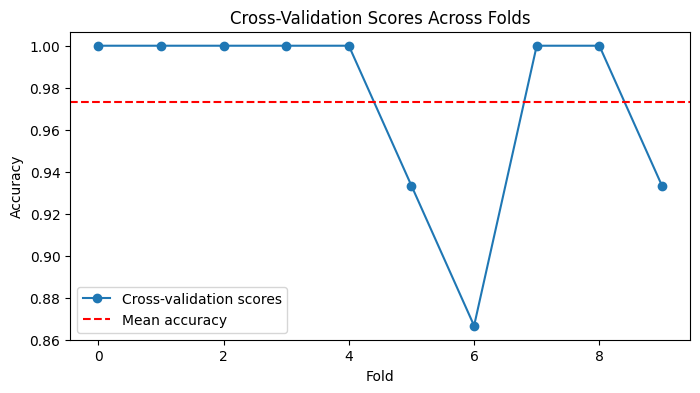

In [31]:
plt.figure(figsize=(8,4))
plt.plot(cv_scores, label='Cross-validation scores', marker='o')
plt.axhline(y=np.mean(cv_scores), color='r', linestyle='--', label='Mean accuracy')
plt.xlabel('Fold')
plt.ylabel('Accuracy')
plt.title('Cross-Validation Scores Across Folds')
plt.legend()
plt.show()

## Evaluation Metrics (for the final SVM Classifier)

In [32]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

print(f"Accuracy: {accuracy_score(y_test, y_pred)}")
print(f"Precision: {precision_score(y_test, y_pred, average='macro')}")
print(f"Recall: {recall_score(y_test, y_pred, average='macro')}")
print(f"F1 Score: {f1_score(y_test, y_pred, average='macro')}")

Accuracy: 1.0
Precision: 1.0
Recall: 1.0
F1 Score: 1.0


The final SVM Classifer model with the best parameters given by the grid search achieves perfoect scores across all evaluation metrics.